In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta as td
import time
import TDMS_MHD as MHD
import pandas as pd
%matplotlib inline


class VaporTubes(MHD.TDMS,MHD.TDMS_pd):
    def __init__(self, ):
        MHD.TDMS.__init__(self) 
        MHD.TDMS_pd.__init__(self)   
    
def find_nearest(a, a0):
    "Element in nd array `a` closest to the scalar value `a0`"
    idx = np.abs(a - a0).argmin()
    return idx
    
    


In [33]:
Run3 = VaporTubes()
laserprofile = VaporTubes()
Run3.set_pathnames("C:\\Users\\aspit\\OneDrive\\Data\\Excimer\\2018-03-13")
laserprofile.set_pathnames("C:\\Users\\aspit\\OneDrive\\Data\\2017-10-23")
print(Run3.pathnames[0])

C:\Users\aspit\OneDrive\Data\Excimer\2018-03-13\Run1_Powermeter.tdms


In [7]:
filepath = Run3.pathnames['Run3_Rb.tdms']
Run3.import_data(filepath)
file1 = Run3.imports[filepath]

filepath_laser = laserprofile.pathnames[0]
laserprofile.import_data(filepath_laser)
file_laser = laserprofile.imports[filepath_laser]

In [10]:
file1.groups()

['Common',
 'Wavelength array',
 'Gate Delay Arrays',
 'Integrated emission',
 'Raw_Capture_3']

In [19]:
#Pull in relevant groups
timearrays = Run3.get_data_pdframe(file1,'Gate Delay Arrays')
wl = Run3.get_data_pdframe(file1,'Wavelength array')
df1 = Run3.get_data_pdframe(file1,'Raw_Capture_3')
laser_common = laserprofile.get_data_pdframe(file_laser,'Raw')
laser_data = laserprofile.get_data_pdframe(file_laser,'Average')

In [22]:

wl = wl['Wavelength_3'].as_matrix()
time = timearrays['Gate Delay3'].as_matrix()
time = time[~np.isnan(time)]

laser_time = laser_common['Time1']
laser_data = laser_data['Mean']*4


In [25]:
idx_peak1_l = find_nearest(wl,778)
idx_peak1_r = find_nearest(wl,780.5)

idx_peak2_l = find_nearest(wl,792)
idx_peak2_r = find_nearest(wl,796)

wl_peak1 = wl[idx_peak1_l:idx_peak1_r]
wl_peak2 = wl[idx_peak2_l:idx_peak2_r]

data_peak1 = df1[idx_peak1_l:idx_peak1_r]
data_peak2 = df1[idx_peak2_l:idx_peak2_r]

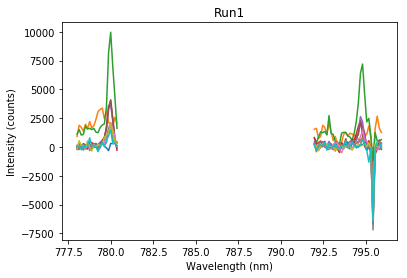

In [26]:
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity (counts)")
plt.title("Run1")
plt.plot(wl_peak1,data_peak1_run1)
plt.plot(wl_peak2,data_peak2_run1)

In [29]:
avg_peak1 = []
avg_peak2 = []

for frame in data_peak1:
    maximum = data_peak1[frame].max()
    avg_peak1 = np.append(avg_peak1, maximum)
    
for frame in data_peak2:
    maximum = data_peak2[frame].max()
    avg_peak2 = np.append(avg_peak2, maximum)


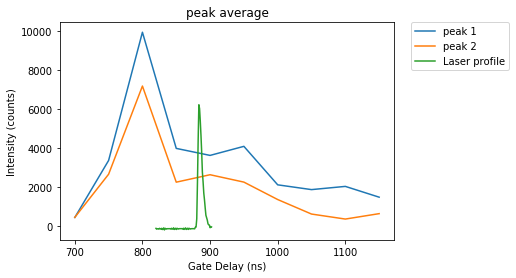

In [32]:
plt.xlabel("Gate Delay (ns)")
plt.ylabel("Intensity (counts)")
plt.title("peak average")
plt.plot(time, avg_peak1, label = "peak 1")
plt.plot(time, avg_peak2, label = "peak 2")
plt.plot(laser_time, laser_data, label = "Laser profile")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)